In [1]:
## Initialization
#pakages
ENV["JULIA_PKG_SERVER"] = "https://jp.pkg.julialang.org"
using Pkg
using CSV
using DataFrames
using DifferentialEquations
using Interpolations
using Plots

stoi_mat = [0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0 -1  0 -1  0 -1 0  0  0 0  0 0 0 0 0 0 0;
            0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0 0 -1 0 0 0 0 0 0;
            0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 0  0 0 0 0 0 0 0;
            0  0  0  0  0  0  0  0  0  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  1  1  0  0  0  0 -1  1  1  0  0  0  0  0  0  0  0 -1 0  0 0 0 0 0 0 0;
            0  0  0  0  1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 0  0 0 0 0 0 0 1; #DHAP
            0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 -1 -1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 0  0 0 0 0 0 0 0;
            0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0 0  0 0 -1 0 0 0 0;
            0  0  0  1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 0  0 0 0 1 0 0 0; #F16P
            0  1 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 -1  1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 0  0 0 0 0 0 0 0;
            0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0 0  0 0 0 0 0 0 0;
            0  0  0  0  1  1 -1  0  0  0  0  0  0  0  0  0  1 -1 -1  1  1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0 0  0 0 0 0 0 0 0;
            1 -1  1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 0  0 0 0 0 0 0 0;
           -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 1  0 0 0 0 0 0 0;
            0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 -1  0  0  0  0  0  0  0 0  0 0 0 0 0 0 0;
            0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 -1  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0 0  0 0 0 0 0 0 0;
            0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 0  0 0 0 0 0 0 0;
            0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0 0  0 -1 0 0 0 0 0;
            0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 -1  1  0  0 -1  0  1  0  0  0  0  0  0  0 0  0 0 0 0 0 0 0;
            0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  1 -1  1 -1  0  0  0  0  0  0  0  0 -1  0 0  0 0 0 0 0 0 0;
           -1  0  0  0  0  0  0  1 -1 -1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  1  0  0  0  0  0  0  0  0  0  0 0  0 0 0 -1 0 0 0; #PEP
            0  0  0  0  0  0  1 -1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 0  0 0 0 0 0 0 0;
            0  0  0  0  0  0  0  0  0  0  0  0  1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0 0  0 0 0 0 0 0 0;
            1  0  0  0  0  0  0  0  0  1 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  1  0 -1  0  0  0  0 0  0 0 0 1 0 0 0; #PYR
            0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 -1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0 0  0 0 0 0 0 0 0;
            0  0  0  0  0  0  0  0  0  0  0  0  0  1 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 0  0 0 0 0 0 0 0;
            0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 -1 -1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 0  0 0 0 0 0 0 0;
            0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 -1  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0 0  0 0 0 0 0 0 0;
            0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0 -1  1  0  0 -1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 0  0 0 0 0 0 0 0;
            0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 0  0 0 0 -1 1 0 0; #Fructose
            0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 0  0 0 0  0 0 1 -1; #Glycerol
]    

30×50 Matrix{Int64}:
  0   0   0   0   0   0   0   0   0  …   0   0  0   0  0   0   0  0  0   0
  0   0   0   0   0   0   0   0   0      0   0  0  -1  0   0   0  0  0   0
  0   0   0   0   0   0   0   0   0      0   0  0   0  0   0   0  0  0   0
  0   0   0   0   0   0   0   0   0      0  -1  0   0  0   0   0  0  0   0
  0   0   0   0   1  -1   0   0   0      0   0  0   0  0   0   0  0  0   1
  0   0   0   0   0   0   0   0   0  …   0   0  0   0  0   0   0  0  0   0
  0   0   0   0   0   0   0   0   0      0   0  0   0  0  -1   0  0  0   0
  0   0   0   1  -1   0   0   0   0      0   0  0   0  0   0   1  0  0   0
  0   1  -1  -1   0   0   0   0   0      0   0  0   0  0   0   0  0  0   0
  0   0   0   0   0   0   0   0   0      0   0  0   0  0   0   0  0  0   0
  0   0   0   0   1   1  -1   0   0  …   0   0  0   0  0   0   0  0  0   0
  1  -1   1   0   0   0   0   0   0      0   0  0   0  0   0   0  0  0   0
 -1   0   0   0   0   0   0   0   0      0   0  1   0  0   0   0  0  0   0
  ⋮ 

In [8]:
function Ecoli_full(du, u, p, t)
  f = [u[13] * u[20], u[12], u[9], u[9], u[8], u[5], u[11], u[21], u[20], u[20],
  u[23], u[23], u[12], u[22], u[25], u[25], u[24]*u[28], u[11]*u[26], u[11]*u[26], u[6]*u[9],
  u[6]*u[28], u[9]*u[11], u[1]*u[19], u[3],u[15], u[16], u[27], u[10], u[18], u[19],
  u[4]*u[20], u[19], u[18], u[15], u[1]*u[14], u[22], u[1], u[23], u[1], u[24],
  u[19], u[4], 1, u[2], u[17], u[7], u[29]*u[20], 1, 1, u[30]]
  r = p .* f
  du_vec = stoi_mat * r
  # du = du_vec
  du[1] = du_vec[1]
  du[2] = du_vec[2]
  du[3] = du_vec[3]
  du[4] = du_vec[4]
  du[5] = du_vec[5]
  du[6] = du_vec[6]
  du[7] = du_vec[7]
  du[8] = du_vec[8]
  du[9] = du_vec[9]
  du[10] = du_vec[10]
  #du[10] = p[27]*u[27] - p[28]*u[10]
  du[11] = du_vec[11]
  du[12] = du_vec[12]
  du[13] = du_vec[13]
  du[14] = du_vec[14]
  du[15] = du_vec[15]
  du[16] = du_vec[16]
  du[17] = du_vec[17]
  du[18] = du_vec[18]
  du[19] = du_vec[19]
  du[20] = du_vec[20]
  du[21] = du_vec[21]
  du[22] = du_vec[22]
  du[23] = du_vec[23]
  du[24] = du_vec[24]
  du[25] = du_vec[25]
  du[26] = du_vec[26]
  du[27] = du_vec[27]
  du[28] = du_vec[28]
  du[29] = du_vec[29]
  du[30] = du_vec[30]
end

p1 = [5.0, 4.7, 7.8, 5.7, 3.8, 9.7, 5.0, 6.2, 3.5, 9.8,
2.5, 6.1, 4.0, 3.8, 7.8, 6.6, 3.8, 5.5, 5.7, 4.7,
8.0, 7.3, 9.2, 1.1, 9.6, 7.4, 7.4, 8.3, 6.2, 6.4,
6.2, 7.9, 9.1, 6.7, 1.6, 9.6, 4.7, 5.1, 7.3, 3.8,
8.4, 9.7, 4.8, 2.0, 8.0, 3.7, 1.2, 2.4, 1.7, 3.1]

u0 = [ 0.5525482912286208,
 1.2984883619064655,
 0.7831089463581931,
 0.9029482495125633,
 0.619921375194015,
 0.18814766387786094,
 1.0901627887272298,
 1.1350622929726477,
 0.335657232754716,
 0.10378547199047403,
     2.6063694852329164,
 0.8526563913436662,
 1.4232759299446178,
 0.4005080578097751,
 0.052847839013617184,
 0.06855934731161392,
 0.8199796847208403,
 0.1503280103155392,
 0.16945612516284517,
 0.6745004185270572,
 2.482675592193429,
 0.2545243881906644,
 1.2862426786084995,
 0.047727985651850574,
 0.0671661497910201,
 0.03761043931831252,
 0.11640804692621047,
 4.4168898171712065,
 2.965159970661429,
 0.5483870967741933
]

tspan1 = (0.0, 10.0)

prob1 = ODEProblem(Ecoli_full,u0,tspan1,p1)
sol1 = solve(prob1, Vern9())
sol_mat1 = reduce(hcat,sol1.u)'

1438×30 adjoint(::Matrix{Float64}) with eltype Float64:
 0.552548  1.29849  0.783109  0.902948  …  4.41689  2.96516  0.548387
 0.552548  1.29849  0.783109  0.902948     4.41685  2.96516  0.548387
 0.552548  1.29849  0.783109  0.902948     4.41689  2.96516  0.548387
 0.552548  1.29849  0.783109  0.902948     4.4169   2.96516  0.548387
 0.552548  1.29849  0.783109  0.902948     4.4169   2.96516  0.548387
 0.552548  1.29849  0.783109  0.902948  …  4.4169   2.96516  0.548387
 0.552548  1.29849  0.783109  0.902948     4.4169   2.96516  0.548387
 0.552548  1.29849  0.783109  0.902948     4.4169   2.96516  0.548387
 0.552548  1.29849  0.783109  0.902948     4.4169   2.96516  0.548387
 0.552548  1.29849  0.78311   0.902948     4.41691  2.96516  0.548387
 0.552548  1.29849  0.78311   0.902948  …  4.41691  2.96516  0.548387
 0.552548  1.29849  0.78311   0.902949     4.41691  2.96516  0.548387
 0.552548  1.29849  0.78311   0.902949     4.41691  2.96516  0.548387
 ⋮                                

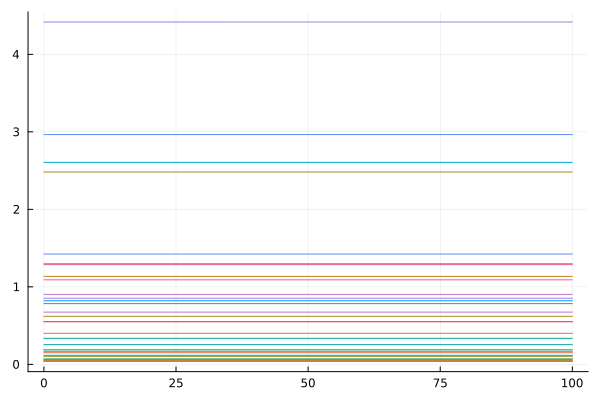

In [9]:
plot(sol1.t, sol_mat1, label = "")

In [13]:
length1 = size(sol_mat1)[1]

1438

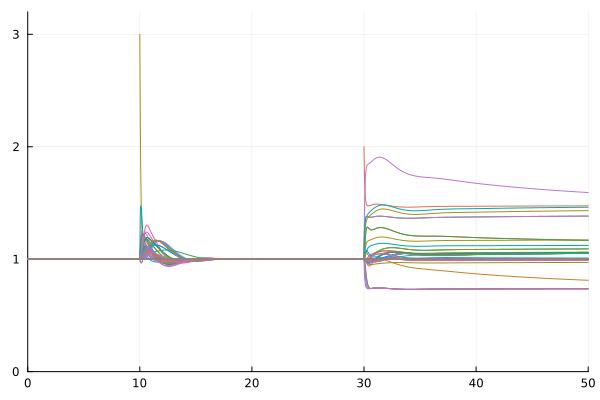

In [15]:
plot(sol1.t, sol_mat1, label = "")
flux_mat1 = zeros((size(sol_mat1)[1], 50))
for i in 1:size(sol_mat1)[1]
  u = copy(sol_mat1[i,:])
  f1 = [u[13] * u[20], u[12], u[9], u[9], u[8], u[5], u[11], u[21], u[20], u[20],
  u[23], u[23], u[12], u[22], u[25], u[25], u[24]*u[28], u[11]*u[26], u[11]*u[26], u[6]*u[9],
  u[6]*u[28], u[9]*u[11], u[1]*u[19], u[3],u[15], u[16], u[27], u[10], u[18], u[19],
  u[4]*u[20], u[19], u[18], u[15], u[1]*u[14], u[22], u[1], u[23], u[1], u[24],
  u[19], u[4], 1, u[2], u[17], u[7], u[29]*u[20], 1, 1, u[30]]
  r1 = p1 .* f1
  flux_mat1[i,:] = r1
end
plot(sol1.t, flux_mat1, label = "")

p2 = copy(p1)
p2[5] = 3*p2[5]

p3 = copy(p2)
p3[2] = 2*p3[2]

tspan2 = (10.0, 30.0)
u02 = sol_mat1[length1,:]

prob2 = ODEProblem(Ecoli_full,u02,tspan2,p2)
sol2 = solve(prob2, Vern9())
sol_mat2 = reduce(hcat,sol2.u)'

length2 = size(sol_mat2)[1]
tspan3 = (30.0, 50.0)
u03 = sol_mat2[length2,:]

prob3 = ODEProblem(Ecoli_full,u03,tspan3,p3)
sol3 = solve(prob3, Vern9())
sol_mat3 = reduce(hcat,sol3.u)'


flux_mat2 = zeros((size(sol_mat2)[1], 50))
for i in 1:size(sol_mat2)[1]
  u = copy(sol_mat2[i,:])
  f2 = [u[13] * u[20], u[12], u[9], u[9], u[8], u[5], u[11], u[21], u[20], u[20],
  u[23], u[23], u[12], u[22], u[25], u[25], u[24]*u[28], u[11]*u[26], u[11]*u[26], u[6]*u[9],
  u[6]*u[28], u[9]*u[11], u[1]*u[19], u[3],u[15], u[16], u[27], u[10], u[18], u[19],
  u[4]*u[20], u[19], u[18], u[15], u[1]*u[14], u[22], u[1], u[23], u[1], u[24],
  u[19], u[4], 1, u[2], u[17], u[7], u[29]*u[20], 1, 1, u[30]]
  r2 = p2 .* f2
  flux_mat2[i,:] = r2
end

flux_mat3 = zeros((size(sol_mat3)[1], 50))
for i in 1:size(sol_mat3)[1]
  u = copy(sol_mat3[i,:])
  f3 = [u[13] * u[20], u[12], u[9], u[9], u[8], u[5], u[11], u[21], u[20], u[20],
  u[23], u[23], u[12], u[22], u[25], u[25], u[24]*u[28], u[11]*u[26], u[11]*u[26], u[6]*u[9],
  u[6]*u[28], u[9]*u[11], u[1]*u[19], u[3],u[15], u[16], u[27], u[10], u[18], u[19],
  u[4]*u[20], u[19], u[18], u[15], u[1]*u[14], u[22], u[1], u[23], u[1], u[24],
  u[19], u[4], 1, u[2], u[17], u[7], u[29]*u[20], 1, 1, u[30]]
  r3 = p3 .* f3
  flux_mat3[i,:] = r3
end

length3 = size(sol_mat3)[1]

norm_flux_mat1 = zeros(size(flux_mat1))
norm_flux_mat2 = zeros(size(flux_mat2))
norm_flux_mat3 = zeros(size(flux_mat3))

for j in 1:size(flux_mat1)[2]
  norm_flux_mat1[:,j] = flux_mat1[:,j] / flux_mat1[end,j]
  norm_flux_mat2[:,j] = flux_mat2[:,j] / flux_mat1[end,j]
  norm_flux_mat3[:,j] = flux_mat3[:,j] / flux_mat1[end,j]
end

norm_sol_mat1 = zeros(size(sol_mat1))
norm_sol_mat2 = zeros(size(sol_mat2))
norm_sol_mat3 = zeros(size(sol_mat3))

for j in 1:size(sol_mat1)[2]
  norm_sol_mat1[:,j] = sol_mat1[:,j] / sol_mat1[end,j]
  norm_sol_mat2[:,j] = sol_mat2[:,j] / sol_mat1[end,j]
  norm_sol_mat3[:,j] = sol_mat3[:,j] / sol_mat1[end,j]
end

plot(sol1.t[1:length1], norm_flux_mat1[1:length1,:], xlims = (0, 50), ylim = (0, 3.2), label = "", color = [1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50])
plot!(sol2.t[1:length2], norm_flux_mat2[1:length2,:], label = "", color = [1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50])
plot!(sol3.t[1:length3], norm_flux_mat3[1:length3,:], label = "", color = [1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50])

In [16]:
savefig("Flux_EColi.svg")

"C:\\Users\\tjrgh\\Downloads\\Supplementary-code\\Supplementary-data\\Flux_EColi.svg"